Dataset for image classifier

In [56]:
# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter

# Set up visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Define the dataset path
dataset_dir = "data/animals_img_dataset/"  # Update with your dataset path

# Step 1: Load the dataset
# List all classes (folders) in the dataset, ignoring hidden files like .DS_Store
class_names = [f for f in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, f))]
print(f"Classes: {class_names}")

Classes: ['cat', 'butterfly', 'dog', 'sheep', 'spider', 'chicken', 'horse', 'squirrel', 'cow', 'elephant']


Number of images per class


Class distribution:
           Count
cat         1668
butterfly   2112
dog         4863
sheep       1820
spider      4821
chicken     3098
horse       2623
squirrel    1862
cow         1866
elephant    1446


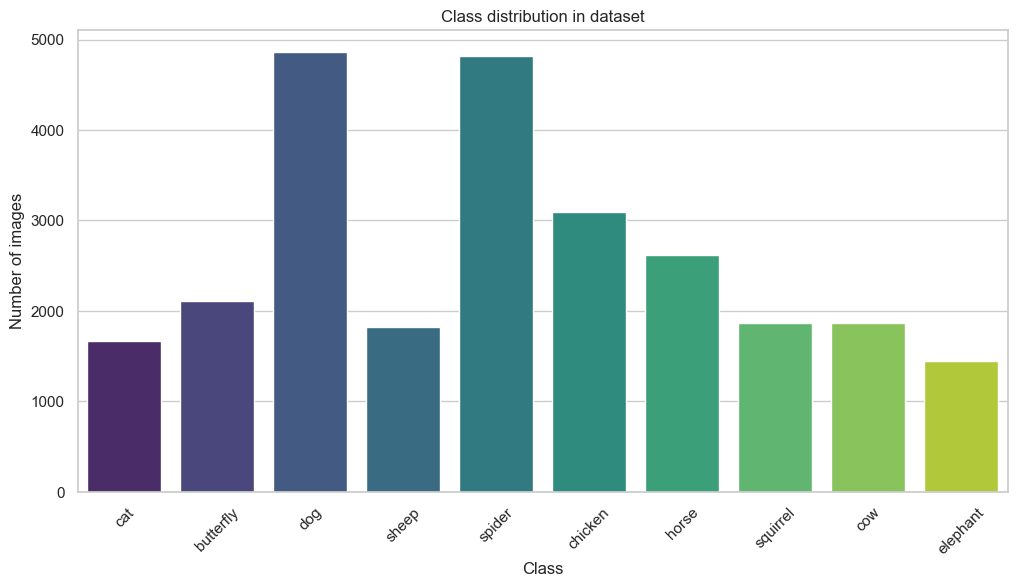

In [57]:
class_counts = {}
for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    class_counts[class_name] = len([f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))])

class_counts_df = pd.DataFrame.from_dict(class_counts, orient="index", columns=["Count"])
print("\nClass distribution:")
print(class_counts_df)

plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts_df.index, y=class_counts_df["Count"], palette="viridis", hue= class_counts_df.index, legend=False)
plt.title("Class distribution in dataset")
plt.xlabel("Class")
plt.ylabel("Number of images")
plt.xticks(rotation=45)
plt.show()

Image sizes analysis


Image sizes summary:
              Width        Height
count  26179.000000  26179.000000
mean     320.038810    252.630162
std      196.935326    148.403298
min       60.000000     57.000000
25%      300.000000    200.000000
50%      300.000000    225.000000
75%      300.000000    300.000000
max     6720.000000   6000.000000


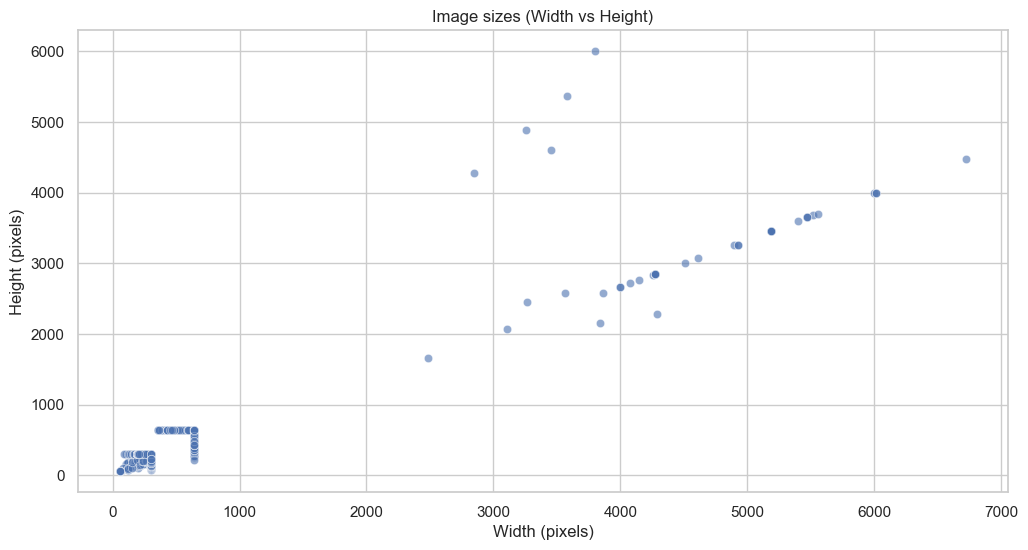

In [58]:
image_sizes = []
for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        if os.path.isfile(image_path):  # Ensure it's a file (not a directory or hidden file)
            try:
                with Image.open(image_path) as img:
                    image_sizes.append(img.size)
            except Exception as e:
                print(f"Skipping {image_path}: {e}")

image_sizes_df = pd.DataFrame(image_sizes, columns=["Width", "Height"])
print("\nImage sizes summary:")
print(image_sizes_df.describe())

plt.figure(figsize=(12, 6))
sns.scatterplot(x="Width", y="Height", data=image_sizes_df, alpha=0.6)
plt.title("Image sizes (Width vs Height)")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.show()

Sample images


Sample images from each class:


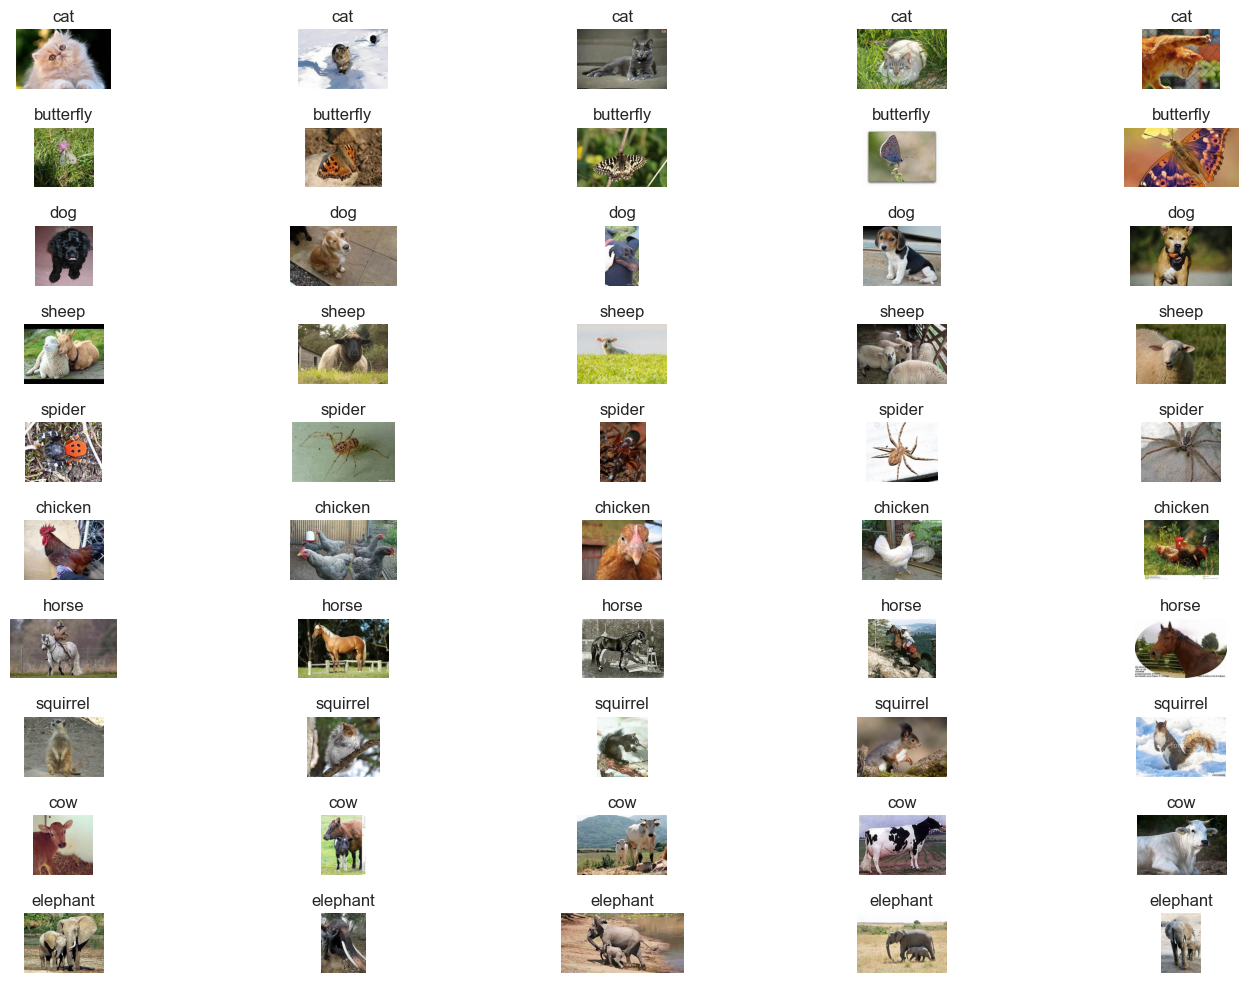

In [59]:
def display_sample_images(dataset_dir, class_names, num_samples=5):
    fig, axes = plt.subplots(len(class_names), num_samples, figsize=(15, 10))
    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(dataset_dir, class_name)
        sample_images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))][:num_samples]
        for j, image_name in enumerate(sample_images):
            image_path = os.path.join(class_dir, image_name)
            try:
                img = Image.open(image_path)
                axes[i, j].imshow(img)
                axes[i, j].set_title(f"{class_name}")
                axes[i, j].axis("off")
            except Exception as e:
                print(f"Skipping {image_path}: {e}")
                axes[i, j].axis("off")  
    plt.tight_layout()
    plt.show()

print("\nSample images from each class:")
display_sample_images(dataset_dir, class_names)

image_formats = []
for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        if os.path.isfile(image_path):  
            try:
                with Image.open(image_path) as img:
                    image_formats.append(img.format)
            except Exception as e:
                print(f"Skipping {image_path}: {e}")

Files formats


Image formats:
Counter({'JPEG': 26128, 'PNG': 51})


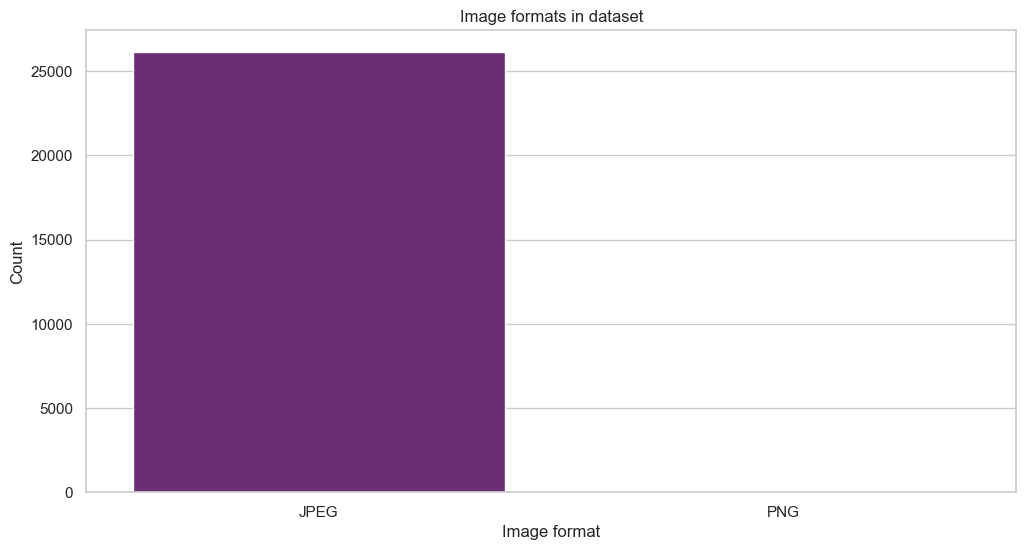

In [60]:
format_counts = Counter(image_formats)
print("\nImage formats:")
print(format_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(format_counts.keys()), y=list(format_counts.values()), palette="magma", hue=list(format_counts.keys()), legend=False)
plt.title("Image formats in dataset")
plt.xlabel("Image format")
plt.ylabel("Count")
plt.show()

Dataset for image classifier

In [61]:
import json

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

def load_ner_dataset(file_path):
    data = []
    with open(file_path, "r") as file:
        for line in file:
            data.append(json.loads(line))
    return data

ner_data_path = "data/ner_labeled_dataset.jsonl"  # Replace with your actual path
ner_data = load_ner_dataset(ner_data_path)

ner_df = pd.DataFrame(ner_data)
print("First 5 rows of the dataset:")
print(ner_df.head())



First 5 rows of the dataset:
     id                                    text  \
0  1502            The cat is next to the barn.   
1  1503  The squirrel stayed still for a while.   
2  1504    They couldn't find the cat at first.   
3  1505       I don't see any cow in the photo.   
4  1506                 Is there a spider here?   

                                 label Comments  
0                     [[4, 7, ANIMAL]]       []  
1                    [[4, 12, ANIMAL]]       []  
2                   [[23, 26, ANIMAL]]       []  
3  [[2, 7, NEGATED], [16, 19, ANIMAL]]       []  
4                   [[11, 17, ANIMAL]]       []  


In [62]:
num_samples = len(ner_df)
print(f"\nNumber of samples: {num_samples}")

ner_df["text_length"] = ner_df["text"].apply(lambda x: len(x.split()))
avg_text_length = ner_df["text_length"].mean()
print(f"Average text length: {avg_text_length:.2f} words")


Number of samples: 423
Average text length: 8.12 words



Entity distribution:
Counter({'ANIMAL': 466, 'NEGATED': 95})


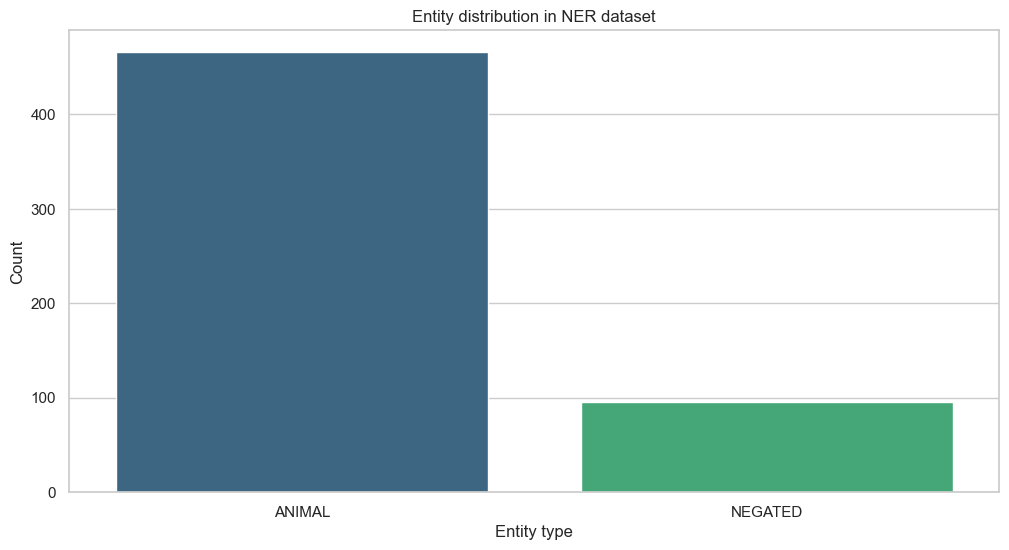

In [63]:
entities = []
for example in ner_data:
    for start, end, entity_type in example["label"]:
        entities.append(entity_type)
        
entity_counts = Counter(entities)
print("\nEntity distribution:")
print(entity_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(entity_counts.keys()), y=list(entity_counts.values()), palette="viridis", label=False, hue=list(entity_counts.keys()))
plt.title("Entity distribution in NER dataset")
plt.xlabel("Entity type")
plt.ylabel("Count")
plt.show()